In [1]:
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NCS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NCS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Question 1

1. Select any article on the website of your interest and perform Name Entity Relation
(NER) analysis on it. Show all the necessary output and visualization and explain
your findings. Also mention if you see any shortcoming or error in the algorithm
output.

In [10]:
#SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus and it supports the following entity types:

In [11]:
# CARDINAL, DATE, EVENT, FAC, GPE, LANGUAGE, LAW, LOC, MONEY, NORP, ORDINAL, ORG, PERCENT, PERSON, PRODUCT, QUANTITY, TIME, WORK_OF_ART

In [12]:
# DATE - Absolute or relative dates or periods
# PERSON - People, including fictional
# GPE - Countries, cities, states
# LOC - Non-GPE locations, mountain ranges, bodies of water
# MONEY - Monetary values, including unit
# TIME - Times smaller than a day
# PRODUCT - Objects, vehicles, foods, etc. (not services)
# CARDINAL - Numerals that do not fall under another type
# ORDINAL - "first", "second", etc.
# QUANTITY - Measurements, as of weight or distance
# EVENT - Named hurricanes, battles, wars, sports events, etc.
# FAC - Buildings, airports, highways, bridges, etc.
# LANGUAGE - Any named language
# LAW - Named documents made into laws.
# NORP - Nationalities or religious or political groups
# PERCENT - Percentage, including "%"
# WORK_OF_ART - Titles of books, songs, etc.

In [13]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [15]:
nlp = spacy.load('en_core_web_sm')
ny_bb = url_to_string('https://www.thenationalnews.com/arts-culture/2022/05/11/how-coke-studio-pakistan-is-building-bridges-through-music/')
article = nlp(ny_bb)
len(article.ents)

187

In [16]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 54,
         'GPE': 45,
         'ORG': 37,
         'DATE': 17,
         'NORP': 13,
         'CARDINAL': 6,
         'ORDINAL': 4,
         'WORK_OF_ART': 4,
         'LOC': 4,
         'FAC': 1,
         'LANGUAGE': 1,
         'EVENT': 1})

In [17]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Pakistan', 17), ('Coke Studio', 10), ('Khan', 8)]

In [27]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

My article is about "How 'Coke Studio Pakistan' is building bridges through music." 
Firstly I checked the total number of entities that the Natural Language Processing libray was
able to predict. It turned out that it was able to label a total of 187 entities. 
In order to extract the top 3 most commonly used terms, we used "Counter(items).most_common(3)" command.
words pakistan was used 17 times, Coke Studio was used 10 time and the name of Coke studio Composer,
"khan" was used 8 times (Zulfiqar Jabbar Khan.) 
After that to see the words and their labels we ran "displacy.render(nlp(str(sentences)), jupyter=True, style='ent')"
command. Our code was able to predict various entities correctly like Pakistan as GPE, December as Date,
14 as cardinal, Asian as NORP, RnB as work of art, Zulfiqar Jabbar Khan as person, Youtube as ORG and so on. However,
at some places it incorrectly labelled the entities. For example it labelled Coke Studio as person instead of ORG,
Sethi as ORG instead of person, "Tu Jhoom" as person instead of work of art and so on.

# Question 3

3. Choose any keyword of your interest and pull/scrap at least 10 (tweets) from Twitter.
Manually put them in a text file. One tweet per line.
a. Read the text file line by line.
b. Perform Sentiment Analysis on the tweet and show total positive and negative
sentiment counts.
c. Display one Positive and one Negative sentiment and discuss if the algorithm
is accurate.

In [31]:
# import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob  #range -1 to 1.

In [32]:
twittertext = open('C:/Users/NCS/Music/Virgin America_tweets.txt','r')

In [46]:
# Initialize counts
positive_count = 0
negative_count = 0
neutral_count = 0

# Read the text file line by line
with open('C:/Users/NCS/Music/Virgin America_tweets.txt', 'r') as file:
    # Iterate over each line in the file
    for line in file:
        tweet_text = line.strip()

        # Perform sentiment analysis
        txt = TextBlob(tweet_text)

        # Count positive and negative sentiments
        if txt.sentiment.polarity > 0:
            positive_count += 1
        elif txt.sentiment.polarity < 0:
            negative_count += 1
        elif txt.sentiment.polarity == 0:
            neutral_count +=1

        # Print the tweet and its sentiment
        print(f'Tweet: {tweet_text}')
        print(f'Sentiment: {txt.sentiment}\n')

# Display total positive and negative sentiment counts
print(f'Total Positive Sentiments: {positive_count}')
print(f'Total Negative Sentiments: {negative_count}')
print(f'Total Neutral Sentiments: {neutral_count}')

Tweet: @VirginAmerica I didn't today... Must mean I need to take another trip!
Sentiment: Sentiment(polarity=-0.390625, subjectivity=0.6875)

Tweet: @VirginAmerica I love the hipster innovation. You are a feel good brand.
Sentiment: Sentiment(polarity=0.6, subjectivity=0.6000000000000001)

Tweet: @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail
Sentiment: Sentiment(polarity=-0.075, subjectivity=0.33124999999999993)

Tweet: @VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS
Sentiment: Sentiment(polarity=5.551115123125783e-17, subjectivity=0.95)

Tweet: @VirginAmerica I have an unused ticket but moved to a new city where you don't fly. How can I fly with you before it expires? #travelhelp
Sentiment: Sentiment(polarity=0.5787878787878787, subjectivity=0.7515151515151515)

Tweet: @VirginAmerica wow this just blew my mind
Sent

Positive Comment: @VirginAmerica I love the hipster innovation. You are a feel good brand.

Negative Comment: @VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS

For positive comment it predicted, Sentiment: Sentiment(polarity=0.6, subjectivity=0.6000000000000001). This is legitimate as the the comment sounds happy and and is giving a positive feedback.

For negative comment it predicted, Sentiment: Sentiment(polarity=5.551115123125783e-17, subjectivity=0.95). I dont feel it is a good predition because it estimated the sentiment as neutral however, it is not. It is a negative comment in which the person is scolding the airline sarcastically for its bad air conditioning system. Therefore the sentiment should be around -1 and not 0. 

# Question 2

2. Select any research paper of your interest and perform word frequency and keyword
extraction analysis. Use at least 3 different techniques/libraries. Show all the
necessary output and visualization and explain your findings. Compare different
techniques and mention if you see any shortcoming or error in the algorithm output.


In [49]:
import PyPDF2

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_number in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_number].extract_text()
    return text

# Specify the path to the PDF file
pdf_path = 'Using MPLS improve IP networking traffic Engineering.pdf'

# Extract text using PyPDF2
extracted_text = extract_text_from_pdf(pdf_path)
raw = extracted_text

Technique 1:

In [50]:
tokenize_words = nltk.tokenize.word_tokenize(raw)
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)
filtered_word_freq.most_common(20)

[('MPLS', 56),
 ('IP', 41),
 ('routing', 33),
 ('traffic', 30),
 ('network', 28),
 ('ATM', 28),
 ('path', 28),
 ('label', 27),
 ('Label', 21),
 ('service', 17),
 ('RSVP', 15),
 ('engineering', 14),
 ('protocol', 14),
 ('based', 14),
 ('networks', 14),
 ('scalability', 14),
 ('used', 14),
 ('packet', 13),
 ('paths', 13),
 ('routers', 13)]

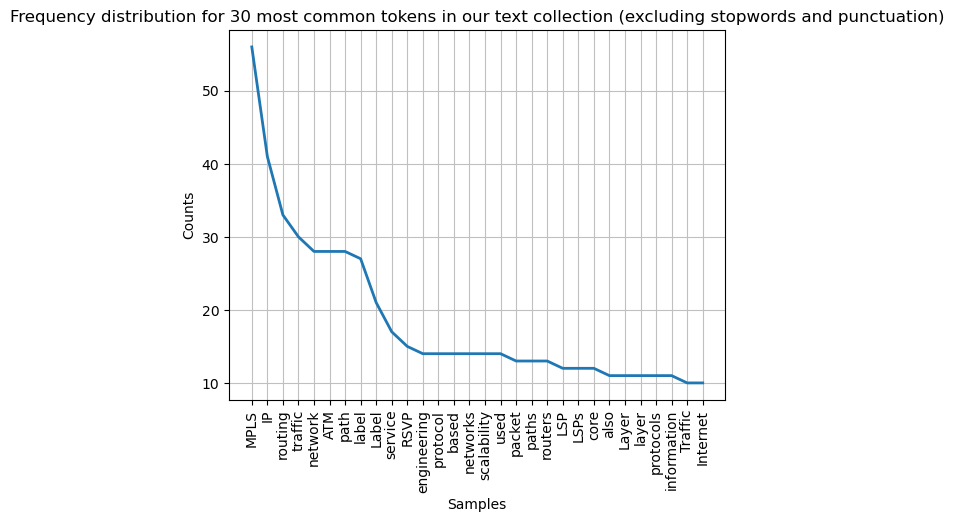

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [52]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

Analysis:

We have used nltk library to tokenize our PDF text into features/ words. We are then implementing code to analyse the most used words in the PDF file. 
The top 3 most used words are MPLS, IP and routing. This can be seen in the list as ('MPLS', 56), ('IP', 41), ('routing', 33) where the second argument is the number of times that word had appeared. The feature plot also show the same thing as MPLS has the highest frequency, IP comes on second and routing comes on third. Word "internet" is the least commonly used words.
    

Technique 2:

In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

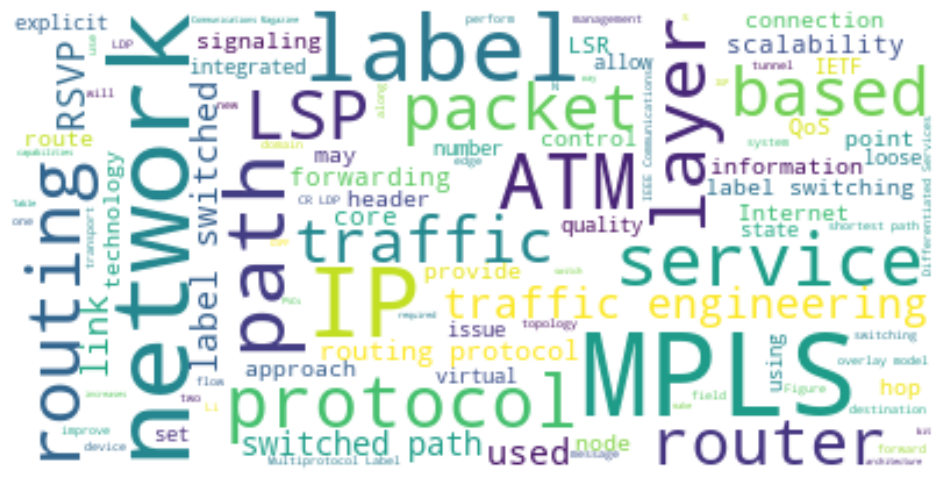

In [58]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Analysis:

We have used WordCloud library to visualize most commonly used words in the PDF. And then plotting that as a wordcloud. We can see that MPLS, netowrk, routing, IP, protocol, Label are some of the most frequently used words. These are the same results as we were getting in the previous analysis with nltk library.

Technique 3:

In [62]:
import yake
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw)
for kw in keywords:
    print(kw)

('MPLS', 0.001903312187604653)
('Label', 0.0038548571067016065)
('Traffic Engineering', 0.004294411175227706)
('path', 0.005586930725958057)
('ATM', 0.005693738350688451)
('Traffic', 0.0058899027429708825)
('routing', 0.006004718461264211)
('Network', 0.006261222844541752)
('Label Switching', 0.008470685808065662)
('Routing protocols', 0.008764229687369196)
('service', 0.010003657521043473)
('networks', 0.01033101769349389)
('Multiprotocol Label', 0.010509178463698926)
('protocol', 0.010672204527355058)
('Network Layer', 0.010830973992756277)
('Layer', 0.01130153192222147)
('ATM networks', 0.011354137126854165)
('shortest path', 0.011800857686494965)
('RSVP', 0.013385167147839671)
('paths', 0.014153557839093743)


Analysis:

We are using Textacy Library for Topic Modeling. I think it is correctly modelling the topics as the PDF is centered around MPLS techinque, Label switching, Traffic Engineering, Routing, Layers and paths in those layers. However there are other topics in PDF that are important like Scalibilty, Quality of Service, signalling and etc. Hence we can say that it is not interpreting the text however it is just analysing and summaring the text with most frequently used words.

Comparision:
All 3 techniques were able to correctly model the PDF text. They all produced the desired results that resembles and supported each other, hence all techniques are reliable enough. For Word Cloud there might be some short coming in case of unnecesssary words, which we could remove using STOPWORDS technique. But we were not getting any unusual words in our word cloud therefore we didnt use Stopwords. Moreover, Yake library can also be trusted for topic modelling but it doesnot model all the significant topics therefore we can declare its results as the complete result for topic modelling. 